In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create data
X = []
myseed = 42
np.random.seed(myseed)
for i in range(500):
    X.append(np.sin(2*np.random.randint(1000) + np.random.randint(-1, 1)))
Xten = torch.tensor(X, dtype=torch.float32).unsqueeze(1)

In [3]:
# selecting a machine learning algorithm to train 
# 1- Let's use Linear regression first 
weights = 3.5
bias = 1
y = weights * Xten + bias

In [4]:
# Create train/test split
train_split = int(0.8 * len(Xten)) # 80% of data used for training set, 20% for testing 
X_train, y_train = Xten[:train_split], y[:train_split]
X_test, y_test = Xten[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
      
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 14});

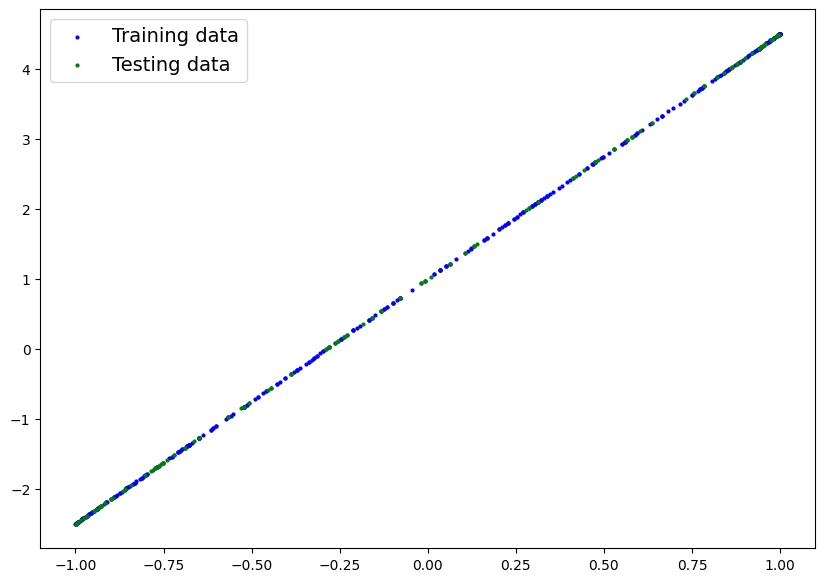

In [6]:
plot_predictions()

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [8]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

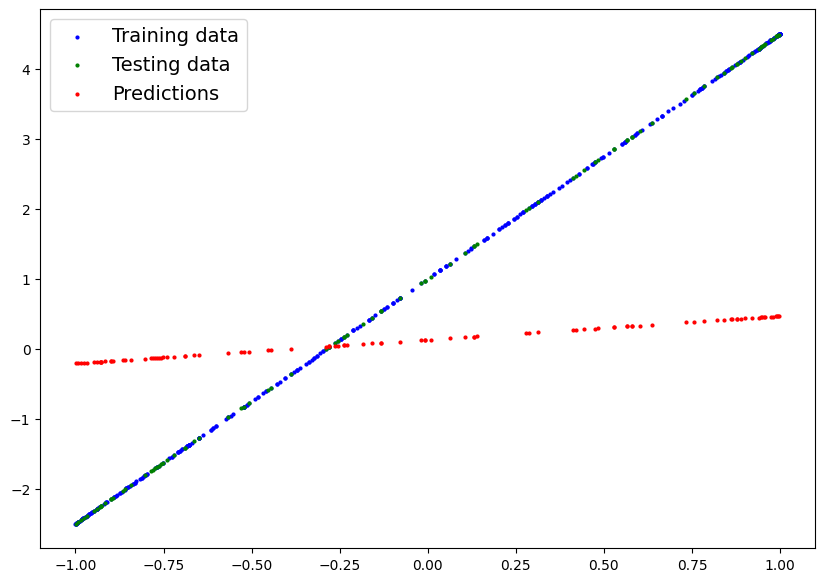

In [11]:
plot_predictions(predictions=y_preds)

In [13]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [15]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 500

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
torch.save(obj=model_0.state_dict(), f="model.pth")

Epoch: 0 | MAE Train Loss: 0.11601953208446503 | MAE Test Loss: 0.10994517058134079 
Epoch: 10 | MAE Train Loss: 0.07774236053228378 | MAE Test Loss: 0.0724530890583992 
Epoch: 20 | MAE Train Loss: 0.03946872428059578 | MAE Test Loss: 0.03493771702051163 
Epoch: 30 | MAE Train Loss: 0.001195111544802785 | MAE Test Loss: 0.0025778841227293015 
Epoch: 40 | MAE Train Loss: 0.0012650744756683707 | MAE Test Loss: 0.002845314098522067 
Epoch: 50 | MAE Train Loss: 0.0017275558784604073 | MAE Test Loss: 0.008238418027758598 
Epoch: 60 | MAE Train Loss: 0.0017275558784604073 | MAE Test Loss: 0.008238418027758598 
Epoch: 70 | MAE Train Loss: 0.0017275558784604073 | MAE Test Loss: 0.008238418027758598 
Epoch: 80 | MAE Train Loss: 0.0017275558784604073 | MAE Test Loss: 0.008238418027758598 
Epoch: 90 | MAE Train Loss: 0.0017275558784604073 | MAE Test Loss: 0.008238418027758598 
Epoch: 100 | MAE Train Loss: 0.0017275558784604073 | MAE Test Loss: 0.008238418027758598 
Epoch: 110 | MAE Train Loss: 0.

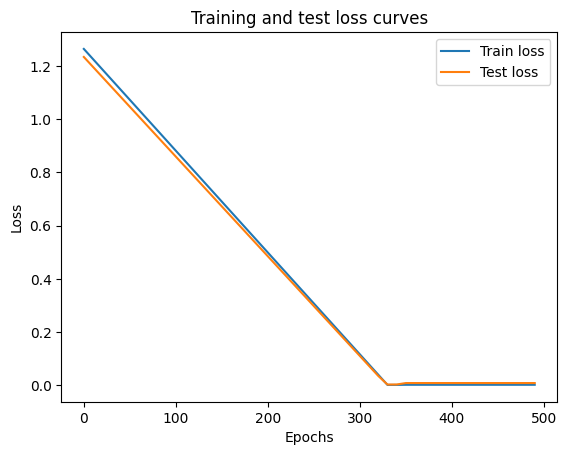

In [52]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [53]:
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[ 1.4651],
        [ 1.4955],
        [-0.5522],
        [-2.2408],
        [-2.4081],
        [ 0.7231],
        [ 2.4720],
        [-0.8227],
        [-0.3554],
        [ 0.9705],
        [ 4.4630],
        [ 4.2886],
        [-1.6860],
        [ 3.6497],
        [-0.7701],
        [-2.4959],
        [-1.7059],
        [ 4.4311],
        [ 2.0975],
        [ 4.3191],
        [-2.0073],
        [-1.7252],
        [ 0.1138],
        [ 4.1153],
        [ 0.3557],
        [-2.2408],
        [ 4.4878],
        [ 3.5670],
        [ 4.4115],
        [-1.3198],
        [ 0.1733],
        [-1.6257],
        [-1.7448],
        [ 1.2179],
        [ 2.8529],
        [ 4.3476],
        [-0.8494],
        [ 2.9819],
        [-2.0226],
        [-2.1398],
        [ 4.1567],
        [-0.9789],
        [-2.3159],
        [ 0.2039],
        [-1.4113],
        [ 4.0718],
        [ 1.9791],
        [-1.8011],
        [-1.5846],
        [ 2.9822],
        [ 2.6928],
        [ 0.1733],
        [-2.

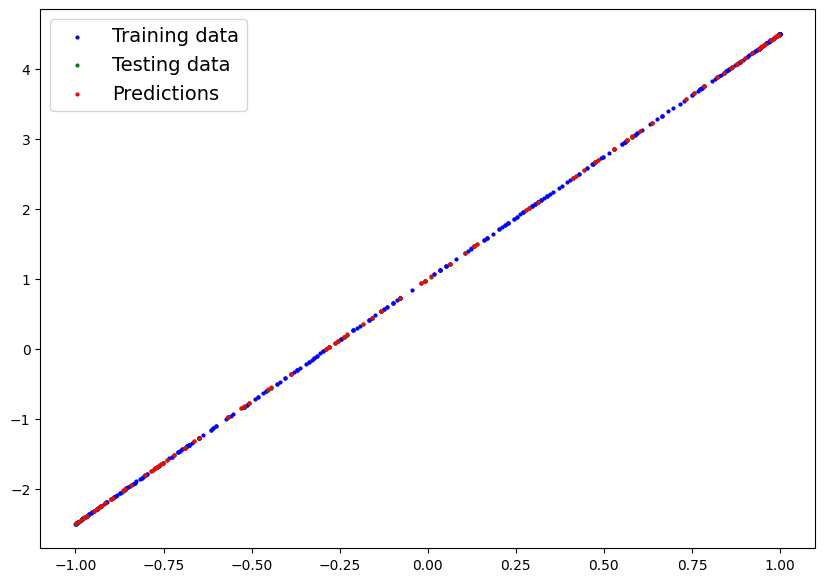

In [54]:
plot_predictions(predictions=y_preds)

In [22]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.0089

In [55]:
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[ 1.4651],
        [ 1.4955],
        [-0.5522],
        [-2.2408],
        [-2.4081],
        [ 0.7231],
        [ 2.4720],
        [-0.8227],
        [-0.3554],
        [ 0.9705],
        [ 4.4630],
        [ 4.2886],
        [-1.6860],
        [ 3.6497],
        [-0.7701],
        [-2.4959],
        [-1.7059],
        [ 4.4311],
        [ 2.0975],
        [ 4.3191],
        [-2.0073],
        [-1.7252],
        [ 0.1138],
        [ 4.1153],
        [ 0.3557],
        [-2.2408],
        [ 4.4878],
        [ 3.5670],
        [ 4.4115],
        [-1.3198],
        [ 0.1733],
        [-1.6257],
        [-1.7448],
        [ 1.2179],
        [ 2.8529],
        [ 4.3476],
        [-0.8494],
        [ 2.9819],
        [-2.0226],
        [-2.1398],
        [ 4.1567],
        [-0.9789],
        [-2.3159],
        [ 0.2039],
        [-1.4113],
        [ 4.0718],
        [ 1.9791],
        [-1.8011],
        [-1.5846],
        [ 2.9822],
        [ 2.6928],
        [ 0.1733],
        [-2.

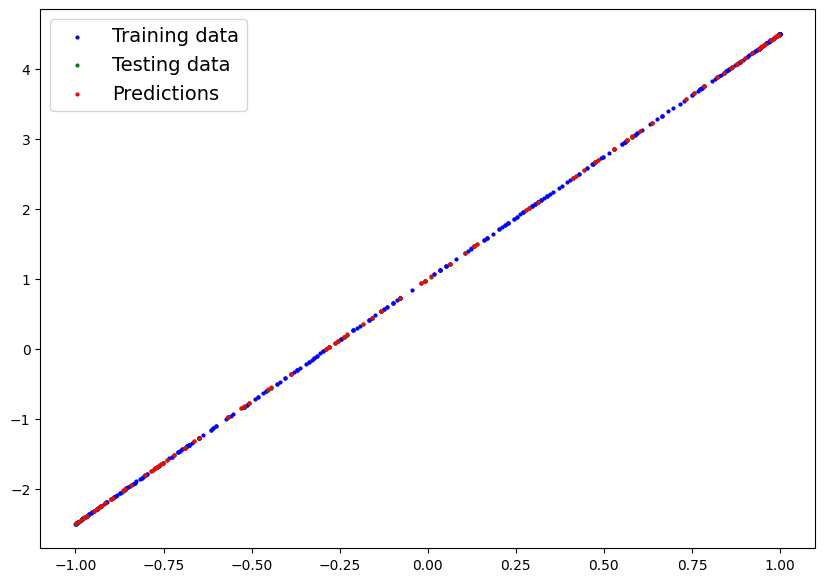

In [56]:
plot_predictions(predictions=y_preds)